# Limpeza dos dados relacionados a quantidade de AIHs aprovadas pelo SUS por estado

## Importações dos pacotes

In [1]:
import pandas as pd
from matplotlib import ticker
from funcoes_datasus import limpa_dados, plot_grafico_linha 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import re

## Dados

In [2]:
dados = pd.read_csv("C:/Users/pedro/Documents/projeto_modulo_1_bootcamp2_alura/dados_brutos/A090739189_28_143_208_aih.csv", encoding="ISO-8859-1",
                    na_values='-',
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",", engine="python")

fonte : http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def

Os dados foram coletados do datasus e dizem respeito do número de AIH(Autorização de Internação Hospitalar) processadas a partir de Janeiro de 2008 por mês e por Unidade Federativa, a fim de causar falsas impressões e ter certeza que os dados são reais e estão atualizados, os dados antes de janeiro de 2008(quando foram processados) serão removidos,o mês de janeiro de 2008 será removido também pois pode haver algum número equivocado.  

Além disso, os dados mais recentes de 2020 e 2021 seram excluísods, e por último a coluna total será removida a fim de melhorar a visualização.

## Funções

In [3]:
@ticker.FuncFormatter
def thousand_formatter(x, pos):
    '''
    Formata os dados para cada Mil internações e mostra duas casas decimais depois da vírgula
    '''
    return "%.2f Mil" % (x/1E3)

## Limpeza dos dados

In [4]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8376,8848,8379,8791,8865,8362,7221,4779,2106,1387140
1,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3571,3574,3725,3985,3849,3861,3588,2898,1788,638624
2,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15417,15709,15727,15796,15424,16213,16344,10777,6256,2251567
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3080,3332,3302,3404,3248,3358,3356,2855,2154,465990
4,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36010,37071,36673,38418,37120,35613,33495,24261,14718,6481636


In [5]:
pd.set_option('display.max_columns',200)
dados.describe()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,2000/Mai,2000/Jun,2000/Jul,2000/Ago,2000/Set,2000/Out,2000/Nov,2000/Dez,2001/Jan,2001/Fev,2001/Mar,2001/Abr,2001/Mai,2001/Jun,2001/Jul,2001/Ago,2001/Set,2001/Nov,2001/Dez,2002/Jan,2002/Fev,2002/Mar,2002/Mai,2002/Jun,2002/Jul,2002/Out,2002/Nov,2002/Dez,2003/Jan,2003/Fev,2003/Mar,2003/Abr,2003/Jun,2003/Jul,2003/Ago,2003/Out,2003/Nov,2003/Dez,2004/Jan,2004/Fev,2004/Mar,2004/Abr,2004/Mai,2004/Jun,2004/Jul,2004/Ago,2004/Set,2004/Out,2004/Nov,2004/Dez,2005/Jan,2005/Fev,2005/Mar,2005/Abr,2005/Mai,2005/Jun,2005/Jul,2005/Ago,2005/Set,2005/Out,...,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez,2014/Jan,2014/Fev,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1.0,5.000000,5.000000,3.0,3.000000,4.00,3.000000,3.000000,2.000000,3.000000,2.000000,5.000000,3.0,4.0,1.0,1.0,2.000000,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,2.000000,1.0,1.0,1.0,3.000000,2.000000,1.0,1.0,1.0,2.000000,7.000000,4.000000,5.0,4.00,6.000000,2.000000,2.000000,1.0,1.0,2.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01
mean,42.0,13.0,16.0,32.0,40.0,20.0,20.0,16.0,24.0,20.0,17.0,20.0,7.0,16.0,16.0,16.0,40.0,20.0,39.0,35.0,17.0,4.0,756.0,1489.0,1387.0,19.0,18.0,91.0,91.0,36.0,36.0,13.500000,63.0,21.0,129.0,50.0,8.000000,5.800000,2.0,7.333333,5.75,8.666667,28.666667,20.000000,6.333333,1.500000,5.600000,1.0,52.5,382.0,19.0,1.500000,36.000000,20.0,4.0,20.0,47.0,94.0,12.0,39.0,12.000000,10.0,19.0,19.0,58.0,46.0,20.0,20.0,10.0,6.0,18.000000,23.0,21.0,20.0,1.0,75.0,1.0,61.0,32.500000,74.0,56.500000,17.0,20.0,55.0,19.000000,40.000000,58.0,76.0,20.0,19.500000,14.714286,5.750000,1.0,3.25,3.000000,123.000000,14.500000,13.0,59.0,21.500000,...,35613.555556,31535.222222,36042.037

Percebe se que os anos anteriores a 2008 tem uma quantidade de linhas menor('count') e parecem tem uma média menor('mean'), provavelmente os dados que correspondem a esses anos na verdade são dados que não foram processados na época quando ocorreram os atendimentos e por esta razão aparecem aqui nos dados processados após 2008, além disso os dados de 2020 e 2021 estão bem abaixos também provavavelmente por não estarem atualizados, vamos analisar isso pelo gráfico para ter uma noção melhor.

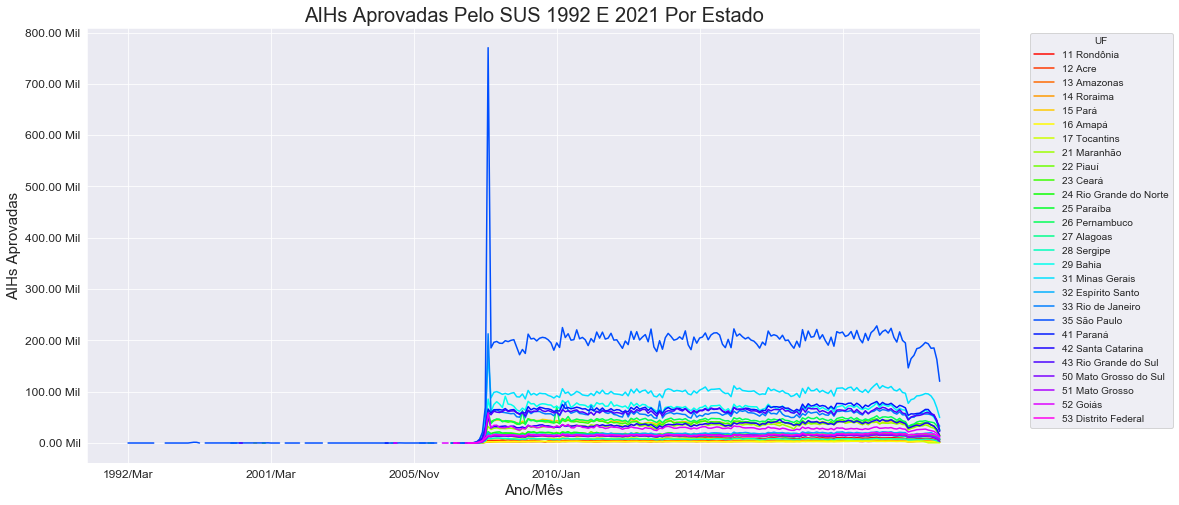

In [6]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')
    
#Criando uma palheta de cores
sns.set_palette(sns.color_palette("gist_rainbow", 27))
    
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(16,8)) 

#Criando o gráfico 
dados.drop('Total', axis=1).set_index('Unidade da Federação').T.plot(ax=ax)

 #Plotando as legendas e mudando o tamanho das fontes
plt.title('AIHs Aprovadas Pelo SUS 1992 E 2021 Por Estado', fontsize=20)
plt.xlabel('Ano/Mês', fontsize=15)
plt.ylabel('AIHs Aprovadas', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(thousand_formatter)
    
#Mostrando o gráfico
plt.show()

Analisando o gráfico com o número de AIH é possível perceber que realmente os dados antes de 2008 e depois de 2019 estão passando uma impressão que pode ser equivocada, parece que os estados não estavam gastando quase nada antes de 2008 e começaram a gastar muito mais e olhando para os dados mais recentes parece que os estados estão começando a gastar menos, o que provavelmente não é verdade.

Por esta razão estarei limitando esses dados entre fevereiro de 2008(eliminando janeiro por ser o primeiro mês de processamento) e dezembro de 2019(pois os anos após isso parecem sofre uma queda muito brusco o que pode não ser verdade) 

Para isso usarei uma função que está em um arquivo py(funcoes_datasus.py) nesse diretório:https://github.com/Pedro-correa-almeida/Projeto_modulo_1/blob/main/notebooks/funcoes_datasus.py

In [7]:
help(limpa_dados)

Help on function limpa_dados in module funcoes_datasus:

limpa_dados(dados, nome)
    Função que recebe um conjunto de dados do datasus e faz diversas manipulações:
        
        renomeia a coluna Unidade da Federação para UF para simplificar
        cria uma coluna para indicar a região
        elimina os números antes do nome dos estados
        elimina a coluna total
        transforma as colunas relacionadas a data em uma coluna apenas(coluna data)
        transforma a coluna data para o tipo date do python
        restringe a data entre fevereiro de 2008 e dezembro de 2019
        
    Parâmetros:
        
        dados: dataframe com a base de dados coletado do datasus, tipo=pd.DataFrame
        nome: nome da variável numérica correspondente, tipo="string""



In [8]:
dados=limpa_dados(dados, 'AIH_aprovadas')
dados

,UF,regiao,data,AIH_aprovadas
0,Rondônia,Norte,2008-02-01,5562
1,Acre,Norte,2008-02-01,3723
2,Amazonas,Norte,2008-02-01,13830
3,Roraima,Norte,2008-02-01,1739
4,Pará,Norte,2008-02-01,40231
...,...,...,...,...
3856,Rio Grande do Sul,Sul,2019-12-01,59873
3857,Mato Grosso do Sul,Centro-Oeste,2019-12-01,14107
3858,Mato Grosso,Centro-Oeste,2019-12-01,14616
3859,Goiás,Centro-Oeste,2019-12-01,27381


Agora os dados estão formatados no padrão previsto: 

Agora vamos ver como os dados se comportam no gráfico, será utilizada uma função no mesmo arquivo .py:


In [9]:
help(plot_grafico_linha)

Help on function plot_grafico_linha in module funcoes_datasus:

plot_grafico_linha(dados, y, hue='UF', title=None, ylabel=None, xlabel='Ano/Mês', legend_title=None, formatter=<matplotlib.ticker.StrMethodFormatter object at 0x0000019C786E8CC8>)
    Função que recebe o dataframe e plota um gráfico de linha com o eixo x com a data e eixo y os valores numéricos 
    Parâmetros:
    
        dados: dataframe do pandas, tipo=pd.DataFrame
        y: nome da variável com os dados numéricos, tipo=string
        hue: variável categórica para agrupar os dados em linhas de diferentes cores, padrão="UF", tipo=string
        title: título do gráfico, padrão=None, tipo=string
        ylabel: legenda do eixo y, padrão=None, tipo=string
        xlabel: legenda do eixo y, padrão="Ano/Mês", tipo=string
        legend_title: título da legenda, padrão=None, tipo=string
        formatter: formato dos dados numéricos, padrão= ticker.StrMethodFormatter("{x:,.2f}")(float com duas casas decimais), tipo=matplotl

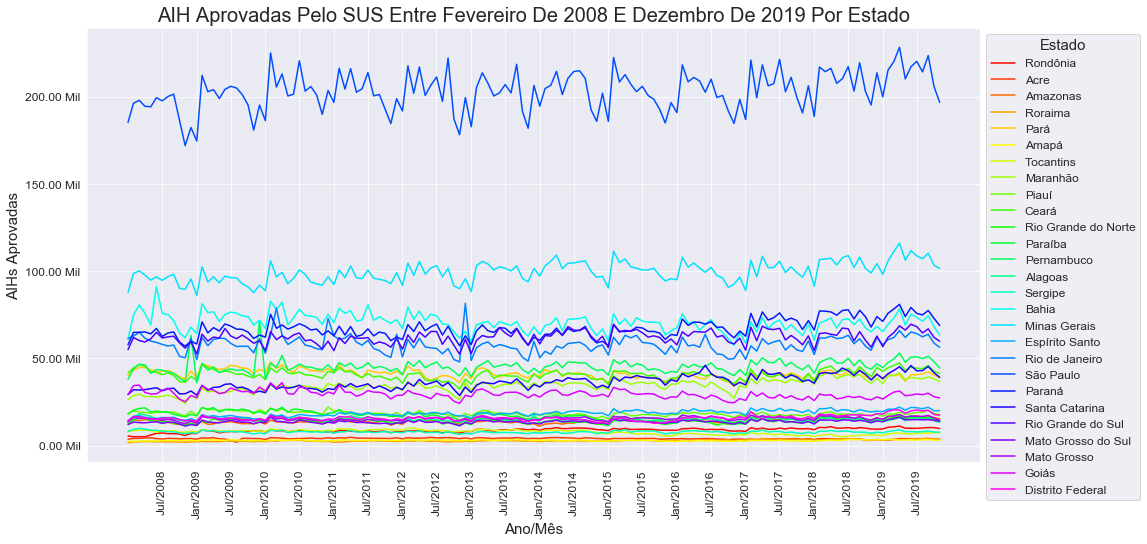

In [10]:
#Plotando um gráfico para visualizar os dados
plot_grafico_linha(dados, 'AIH_aprovadas', title='AIH Aprovadas Pelo SUS Entre Fevereiro De 2008 E Dezembro De 2019 Por Estado', legend_title='Estado', formatter=thousand_formatter, ylabel='AIHs Aprovadas')

Observando o gráfico agora está com dados mais coerentes que fazem mais sentido sem bruscas quedas e subidas.

Vamos analisar agrupando por região para uma análise mais clara.

In [11]:
dados

,UF,regiao,data,AIH_aprovadas
0,Rondônia,Norte,2008-02-01,5562
1,Acre,Norte,2008-02-01,3723
2,Amazonas,Norte,2008-02-01,13830
3,Roraima,Norte,2008-02-01,1739
4,Pará,Norte,2008-02-01,40231
...,...,...,...,...
3856,Rio Grande do Sul,Sul,2019-12-01,59873
3857,Mato Grosso do Sul,Centro-Oeste,2019-12-01,14107
3858,Mato Grosso,Centro-Oeste,2019-12-01,14616
3859,Goiás,Centro-Oeste,2019-12-01,27381


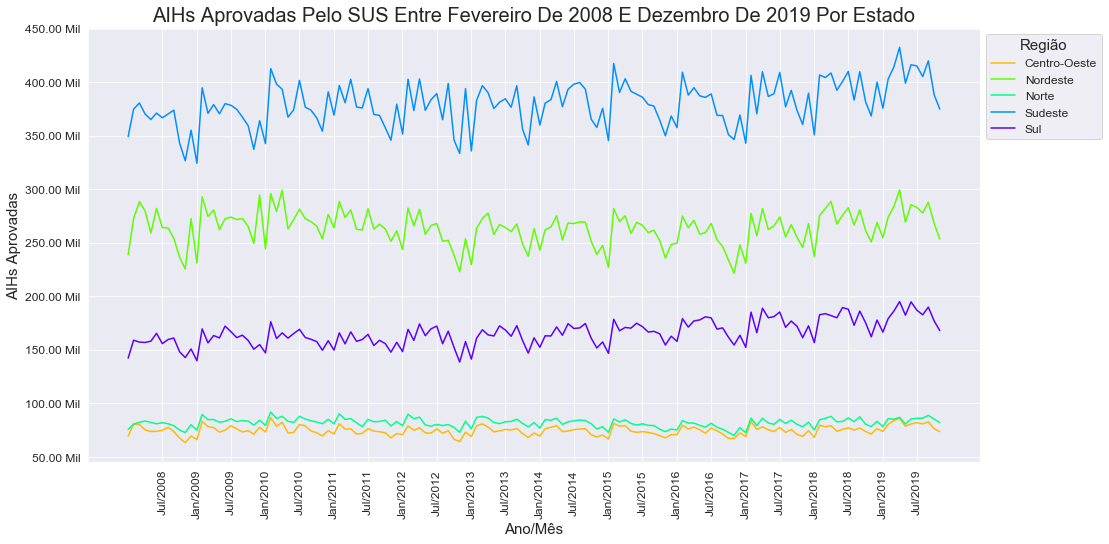

In [12]:
#Plotando um gráfico para visualizar os dados
dados_reg = dados.groupby(['regiao', 'data']).sum().reset_index()
plot_grafico_linha(dados_reg, 'AIH_aprovadas', hue='regiao', title='AIHs Aprovadas Pelo SUS Entre Fevereiro De 2008 E Dezembro De 2019 Por Estado', legend_title='Região', formatter=thousand_formatter, ylabel='AIHs Aprovadas')

Observando o gráfico parece que a quantidade de AIHs se manteve estável durante os anos.

Percebe se que a quantidade de AIHs aprovadas é muito maior nos estados do Sudeste e do Nordeste, imagino que deve ser pela população dos estados nessas regiões, para confirmar isso vou juntar os dados de AIHs com os dados da população de cada estado, para analisar a quantidade de AIHs para cada mil habitantes.

## Análise em relação a população

Para analisar esses dados agora em relação a população do estado vou importar os dados em relação a população dos [dados brutos](https://github.com/Pedro-correa-almeida/Projeto_final_M1_bootcamp_alura/tree/main/dados_brutos).

In [13]:
dados_pop = pd.read_excel('C:/Users/pedro/Documents/projeto_modulo_1_bootcamp2_alura/dados_brutos/serie_2001_2020_TCU_populacao.xls', skiprows=4, skipfooter=10)
dados_pop

,Unidades da Federação,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brasil,172385826.0,174632960.0,176871437.0,181581024.0,184184264.0,186770562.0,183989711.0,189612814.0,191480630.0,190747855.0,192379287.0,193946886.0,201032714.0,202768562.0,204450649.0,206081432.0,207660929.0,208494900.0,210147125.0,211755692.0
2,Região Norte,13245084.0,13504599.0,13784881.0,14373260.0,14698878.0,15022060.0,14623317.0,15142684.0,15359608.0,15880839.0,16095187.0,16318163.0,16983484.0,17231027.0,17472636.0,17707783.0,17936201.0,18182253.0,18430980.0,18672591.0
3,Rondônia,1407886.0,1431777.0,1455907.0,1562085.0,1534594.0,1562417.0,1453756.0,1493566.0,1503928.0,1560501.0,1576455.0,1590011.0,1728214.0,1748531.0,1768204.0,1787279.0,1805788.0,1757589.0,1777225.0,1796460.0
4,Acre,574355.0,586942.0,600595.0,630328.0,669736.0,686652.0,655385.0,680073.0,691132.0,732793.0,746386.0,758786.0,776463.0,790101.0,803513.0,816687.0,829619.0,869265.0,881935.0,894470.0
5,Amazonas,2900240.0,2961801.0,3031068.0,3138726.0,3232330.0,3311026.0,3221940.0,3341096.0,3393369.0,3480937.0,3538387.0,3590985.0,3807921.0,3873743.0,3938336.0,4001667.0,4063614.0,4080611.0,4144597.0,4207714.0
6,Roraima,337237.0,346871.0,357302.0,381896.0,391317.0,403344.0,395725.0,412783.0,421499.0,451227.0,460165.0,469524.0,488072.0,496936.0,505665.0,514229.0,522636.0,576568.0,605761.0,631181.0
7,Pará,6341736.0,6453683.0,6574993.0,6850181.0,6970586.0,7110465.0,7065573.0,7321493.0,7431020.0,7603239.0,7688593.0,7792561.0,7969654.0,8073924.0,8175113.0,8272724.0,8366628.0,8513497.0,8602865.0,8690745.0
8,Amapá,498735.0,516511.0,534835.0,547400.0,594587.0,615715.0,587311.0,613164.0,626609.0,668689.0,684309.0,698602.0,734996.0,750912.0,766679.0,782295.0,797722.0,829494.0,845731.0,861773.0
9,Tocantins,1184895.0,1207014.0,1230181.0,1262644.0,1305728.0,1332441.0,1243627.0,1280509.0,1292051.0,1383453.0,1400892.0,1417694.0,1478164.0,1496880.0,1515126.0,1532902.0,1550194.0,1555229.0,1572866.0,1590248.0


In [14]:
#renomeando coluna 'Unidades da Federação' por 'UF' para juntar com as outras bases de dados
dados_pop = dados_pop.rename(columns={'Unidades da Federação':'UF'})

#Retirando os dados relacionados às regiões
index_drop = [i for i in range(2,len(dados_pop)) if re.match(r'Região.*',dados_pop.loc[i,'UF'])]
dados_pop = dados_pop.drop(index=index_drop)

#Tirando as duas primeiras linhas, pois uma é nula e a outra se refere ao Brasil Todo
dados_pop = dados_pop.drop([0,1])

#Deixando os dados no padrão das outras bases de dados, com uma coluna para data e outra para os valores numéricos
dados_pop = pd.melt(dados_pop, id_vars='UF', var_name='ano', value_name='pop')
dados_pop = dados_pop[(dados_pop['ano'] >=2008) & (dados_pop['ano']<=2019) ]
dados_pop

,UF,ano,pop
189,Rondônia,2008,1493566.0
190,Acre,2008,680073.0
191,Amazonas,2008,3341096.0
192,Roraima,2008,412783.0
193,Pará,2008,7321493.0
...,...,...,...
508,Rio Grande do Sul,2019,11377239.0
509,Mato Grosso do Sul,2019,2778986.0
510,Mato Grosso,2019,3484466.0
511,Goiás,2019,7018354.0


Criando uma coluna no DataFrame original de ano para juntar com os dados de população

In [15]:
dados['ano'] = dados['data'].dt.year
dados

,UF,regiao,data,AIH_aprovadas,ano
0,Rondônia,Norte,2008-02-01,5562,2008
1,Acre,Norte,2008-02-01,3723,2008
2,Amazonas,Norte,2008-02-01,13830,2008
3,Roraima,Norte,2008-02-01,1739,2008
4,Pará,Norte,2008-02-01,40231,2008
...,...,...,...,...,...
3856,Rio Grande do Sul,Sul,2019-12-01,59873,2019
3857,Mato Grosso do Sul,Centro-Oeste,2019-12-01,14107,2019
3858,Mato Grosso,Centro-Oeste,2019-12-01,14616,2019
3859,Goiás,Centro-Oeste,2019-12-01,27381,2019


Concatenando os dois DataFrames e calculando a quantidade de AIHs por mil habitantes

In [16]:
dados = pd.merge(dados, dados_pop, on=['UF','ano'])
dados['AIH_por_mil'] = dados['AIH_aprovadas'] * 1000/dados['pop']
dados

,UF,regiao,data,AIH_aprovadas,ano,pop,AIH_por_mil
0,Rondônia,Norte,2008-02-01,5562,2008,1493566.0,3.723973
1,Rondônia,Norte,2008-03-01,5105,2008,1493566.0,3.417994
2,Rondônia,Norte,2008-04-01,5175,2008,1493566.0,3.464862
3,Rondônia,Norte,2008-05-01,5148,2008,1493566.0,3.446784
4,Rondônia,Norte,2008-06-01,6099,2008,1493566.0,4.083516
...,...,...,...,...,...,...,...
3856,Distrito Federal,Centro-Oeste,2019-08-01,20452,2019,3015268.0,6.782813
3857,Distrito Federal,Centro-Oeste,2019-09-01,19985,2019,3015268.0,6.627935
3858,Distrito Federal,Centro-Oeste,2019-10-01,20292,2019,3015268.0,6.729750
3859,Distrito Federal,Centro-Oeste,2019-11-01,17891,2019,3015268.0,5.933469


Plotando a média de internação por mil habitantes agrupado por região

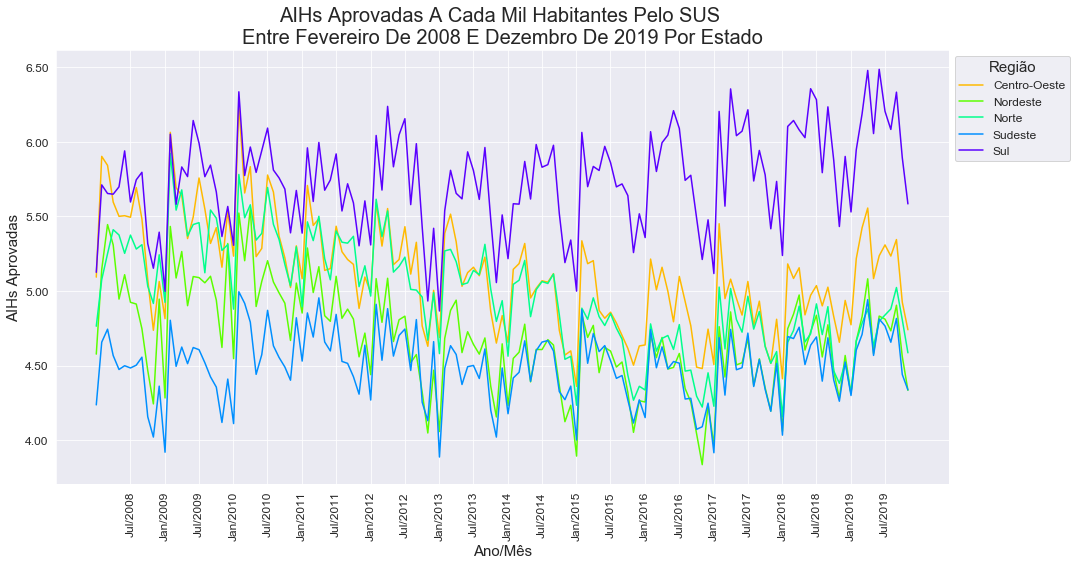

In [17]:
#Plotando um gráfico para visualizar os dados
dados_reg = dados.groupby(['regiao', 'data']).agg({'AIH_por_mil':'mean'}).reset_index()
plot_grafico_linha(dados_reg, 'AIH_por_mil', hue='regiao', title='AIHs Aprovadas A Cada Mil Habitantes Pelo SUS \nEntre Fevereiro De 2008 E Dezembro De 2019 Por Estado', legend_title='Região',ylabel='AIHs Aprovadas')

Observando o gráfico de AIHs em relação à população percebemos que por mais que a região sudeste foi a região que mais teve pessoas internadas, foi a região que apresentou a menor média entre a quantidade de AIHs à cada mil de cada estado, mostrando que a população precisa ser levada em conta na hora de se analisar dados absoulutos que dependem da quantidade total de habitantes.

In [18]:
#Salvando os dados limpos no diretório
dados.to_csv("C:/Users/pedro/Documents/projeto_modulo_1_bootcamp2_alura/dados_limpos/AIH_aprovadas_e_populacao.csv")